# Análise exploratória Tycho Brahe

In [104]:
import re,os,csv
import spacy
import numpy as np

nlp = spacy.load('pt_core_news_sm')

## Para rodar os restuldos importar somente essas bibliotecas

In [2]:
import nltk, csv
import matplotlib.pyplot as plt
from unicodedata import normalize
from nltk.corpus import stopwords
import numpy as np

In [7]:

def remover_acentos(text):
    '''Remove os acentos da string "text". Usada somente na função pre_process
    '''
    return normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')


def pre_process(text):
    '''Realiza um pré processamento da string de entrada "text".
       Retira espaços em branco extras e retira caracteres não alfanuméricos
    '''
    text = re.sub('\s{2,}',' ',text).strip().lower()
    doc = nlp(text)
    # Retira numeros
    text = ' '.join([token.text for token in doc if token.is_alpha == True
                     and token.pos_ != 'PUNCT' and token.is_stop == False])
    return remover_acentos(text)


# Leitura do dicionário de frequências

Rodar célula abaixo para gerar dicionário de frequências a partir do corpus

In [70]:
if 0 == 1:
    path = './txt'
    count = {}
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            with open(os.path.normpath(os.path.join(dirpath,filename)), 'r') as file:
                for text in file.read():
                    pro_text = pre_process(text)
                    for i in pro_text.split():
                        count[i] = count.get(i, 0) + 1
    

In [ ]:
# save count dict to csv file
if 0 == 1:
    w = csv.writer(open("count_dict.csv", "w"))
    for key, val in count.items():
        w.writerow([key, val])

# Cria dict de frequências a partir do arquivo csv

In [3]:
import csv

In [4]:
if 0 == 0:
    with open('count_dict.csv','r') as inp:
        reader = csv.reader(inp)
        count = {rows[0]:int(rows[1]) for rows in reader}

Remove chaves que contenham stopwords e tokens com menos que 2 caracteres.

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tolucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stopWords = set(stopwords.words('portuguese')+['character','title','porque','vossa','todos','ser','tao'])
stopWords = set(remover_acentos(' '.join(stopWords)).split())

Remove palavras com menos de 500 ocorrências.

In [12]:
new_dict = {key:val for key, val in count.items() if key not in stopWords and 500<val and len(key)>2} 

In [13]:
sorted(new_dict.items(), key=lambda kv:kv[1], reverse=1)

[('senhor', 7433),
 ('bem', 6005),
 ('ainda', 4661),
 ('deus', 4602),
 ('grande', 4600),
 ('dom', 4589),
 ('assim', 4584),
 ('tempo', 4265),
 ('tudo', 4126),
 ('pois', 3922),
 ('fazer', 3738),
 ('parte', 3691),
 ('outros', 3515),
 ('onde', 3443),
 ('sobre', 3395),
 ('sempre', 3319),
 ('pode', 3281),
 ('aqui', 3179),
 ('pera', 3139),
 ('dia', 3033),
 ('logo', 2998),
 ('outra', 2847),
 ('agora', 2826),
 ('casa', 2825),
 ('merce', 2775),
 ('todo', 2770),
 ('disse', 2770),
 ('todas', 2744),
 ('outro', 2724),
 ('tanto', 2660),
 ('toda', 2654),
 ('vida', 2600),
 ('homem', 2506),
 ('ter', 2486),
 ('quanto', 2462),
 ('muitos', 2446),
 ('mestre', 2309),
 ('homens', 2304),
 ('mundo', 2303),
 ('joao', 2302),
 ('tal', 2275),
 ('dizer', 2267),
 ('menos', 2239),
 ('carta', 2224),
 ('excelencia', 2222),
 ('terra', 2209),
 ('dias', 2186),
 ('fez', 2179),
 ('dar', 2174),
 ('antes', 2170),
 ('primeiro', 2139),
 ('porem', 2138),
 ('outras', 2120),
 ('pouco', 2119),
 ('amigo', 2068),
 ('nome', 2066),
 ('m

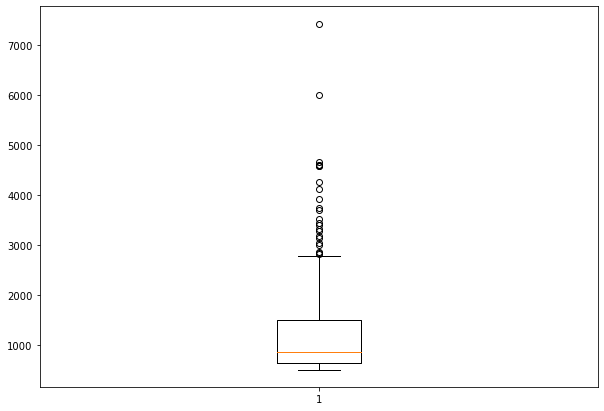

In [14]:
count_int_list = [int(i) for i in list(new_dict.values())]
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(count_int_list)
plt.show()

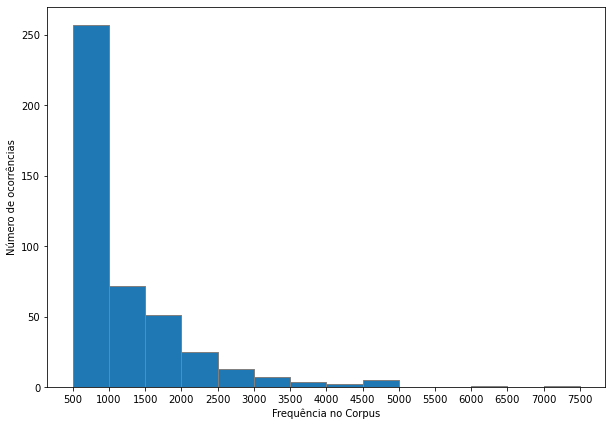

In [15]:
fig, ax = plt.subplots(figsize =(10, 7))
counts, bins, patches = ax.hist(count_int_list, edgecolor='gray', bins=range(500,8000,500))

ax.set_xticks(bins)
ax.set_xlabel('Frequência no Corpus')
ax.set_ylabel('Número de ocorrências')

plt.show()

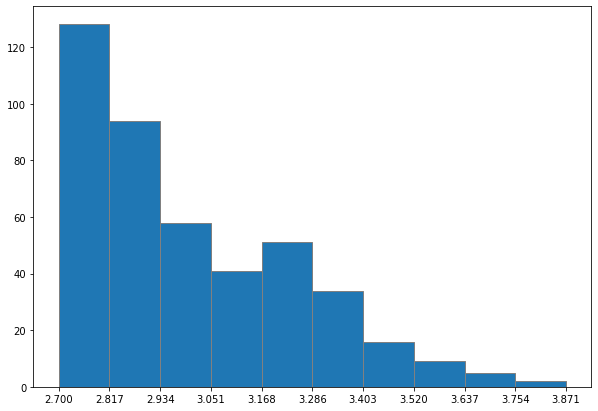

In [17]:

fig, ax = plt.subplots(figsize =(10, 7))
counts, bins, patches = ax.hist(np.log10(count_int_list), edgecolor='gray')

ax.set_xticks(bins)
plt.show()

In [ ]:
new_dict = {key:val for key, val in count.items() if key not in stopWords and 500<val and len(key)>2} 

### Salvando csv filtrado

In [5]:
w = csv.writer(open("most_freq.csv", "w"))
for key, val in new_dict.items():
    w.writerow([key, val])

NameError: name 'new_dict' is not defined

# Busca de Palavras no corpus

In [7]:
count['homem']

2506

In [8]:
count['mulher']

1229

In [9]:
count['pai']

1312

In [13]:
count['mae']

798

In [14]:
count['deus']

4602

In [15]:
count['terra']

2209

In [33]:
count['terra']

'2209'

In [35]:
count['mulheres']

'366'